In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Define the path to the CSV file
url = '/content/MARJANTA_DATA_CW3 (S) (2).csv'
try:
    data = pd.read_csv(url)
    print("Loaded using default UTF-8 encoding")
except UnicodeDecodeError:
    try:
        data = pd.read_csv(url, encoding='ISO-8859-1')
        print("Loaded using ISO-8859-1 encoding")
    except UnicodeDecodeError:
        try:
            data = pd.read_csv(url, encoding='cp1252')
            print("Loaded using cp1252 encoding")
        except UnicodeDecodeError:
            data = pd.read_csv(url, encoding='utf-16')
            print("Loaded using utf-16 encoding")

# Display
print("Initial Data:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Handle missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median())

# Handle missing values for categorical data
categorical_cols = ['Gender', 'Type of Travel', 'Class', 'Destination', 'Continent']
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Check the transformed data
print("\nTransformed Data:")
print(data_encoded.head())

# Optionally, save the cleaned data to a new CSV file
data_encoded.to_csv('/content/cleaned_MARJANTA_DATA.csv', index=False)

# Display path to cleaned data
print("\nPath to cleaned data: /content/cleaned_MARJANTA_DATA.csv")


Loaded using ISO-8859-1 encoding
Initial Data:
   Ref      id  Gender Satisfied  Age  Age Band   Type of Travel     Class  \
0    0   70172    Male         Y   13  Under 18  Personal Travel  Eco Plus   
1    1    5047    Male         N   25  25 to 34  Business travel  Business   
2    2  110028  Female         Y   26  25 to 34  Business travel  Business   
3    3   24026  Female         Y   25  25 to 34  Business travel  Business   
4    4  119299    Male         Y   61  55 to 64  Business travel  Business   

   Flight Distance          Destination  ... Seat comfort  \
0             4760                India  ...            5   
1              235  Republic of Ireland  ...            1   
2             4760                India  ...            5   
3              560               Norway  ...            2   
4             4760                India  ...            5   

   Inflight entertainment  On-board service  Leg room service  \
0                       5                 4         

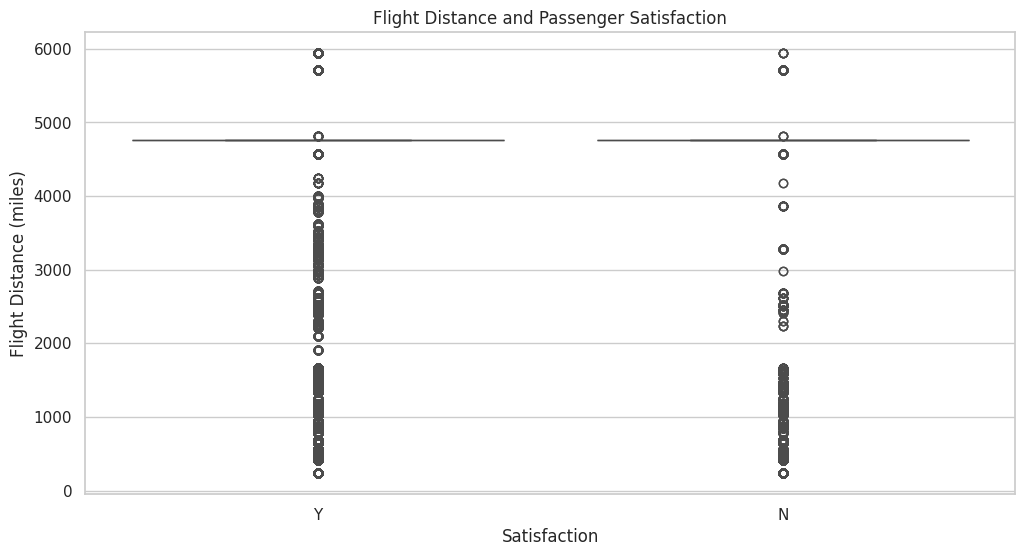

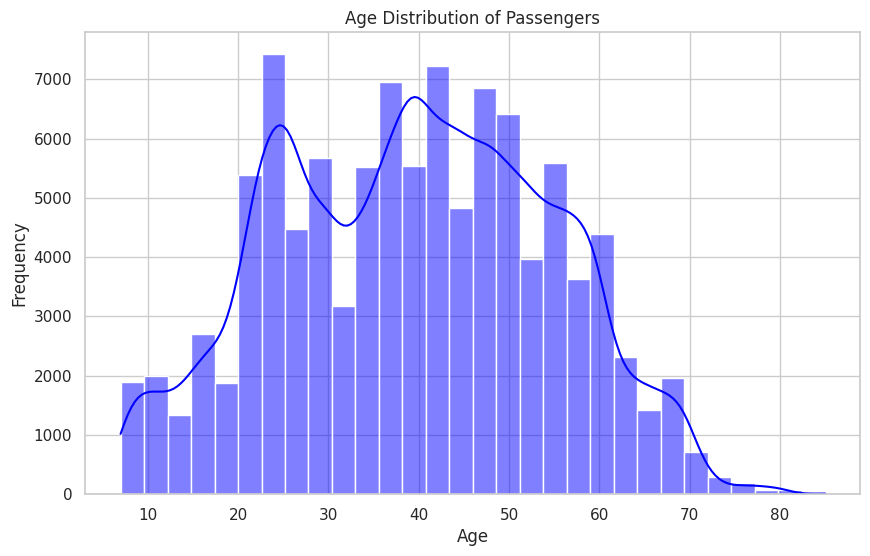

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
data = pd.read_csv('/content/cleaned_MARJANTA_DATA.csv')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Visualization 1: Satisfaction Level by Flight Distance
plt.figure(figsize=(12, 6))
sns.boxplot(x='Satisfied', y='Flight Distance', data=data)
plt.title('Flight Distance and Passenger Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Flight Distance (miles)')
plt.show()

# Visualization 2: Age Distribution of Passengers
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


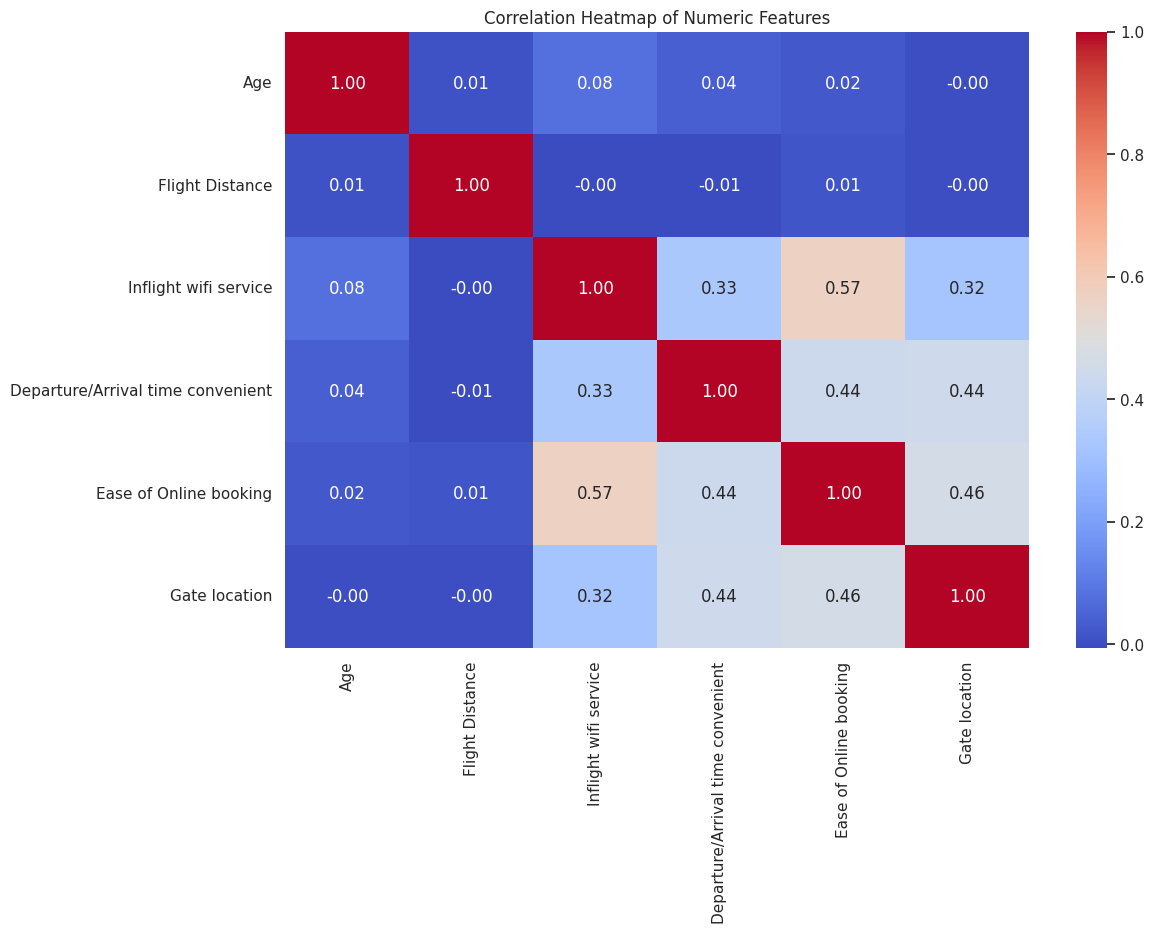

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data
data = pd.read_csv('/content/cleaned_MARJANTA_DATA.csv')

# Selecting numerical columns to include in the correlation matrix
numeric_cols = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']

# Calculate the correlation matrix
correlation_matrix = data[numeric_cols].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [22]:
# Mapping 'Age Band' to numeric values
age_band_mapping = {
    'Under 18': 1,
    '18 to 24': 2,
    '25 to 34': 3,
    '35 to 44': 4,
    '45 to 54': 5,
    '55 to 64': 6,
    '65 or over': 7
}
data['Age Band'] = data['Age Band'].map(age_band_mapping)

# Checking for any other categorical variables and encoding them
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
data = pd.get_dummies(data, columns=categorical_cols)


In [23]:
from sklearn.model_selection import train_test_split

X = data.drop('Satisfied', axis=1)
y = data['Satisfied']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)  # No need to scale data for Random Forest

# Evaluating the models
log_reg_preds = log_reg.predict(X_test_scaled)
rf_preds = random_forest.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_preds))
print(classification_report(y_test, log_reg_preds))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Logistic Regression Accuracy: 0.9226216255233146
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      3775
           1       0.95      0.96      0.95     17006

    accuracy                           0.92     20781
   macro avg       0.88      0.86      0.87     20781
weighted avg       0.92      0.92      0.92     20781

Random Forest Accuracy: 0.9849862855492998
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3775
           1       0.99      0.99      0.99     17006

    accuracy                           0.98     20781
   macro avg       0.98      0.97      0.97     20781
weighted avg       0.98      0.98      0.98     20781



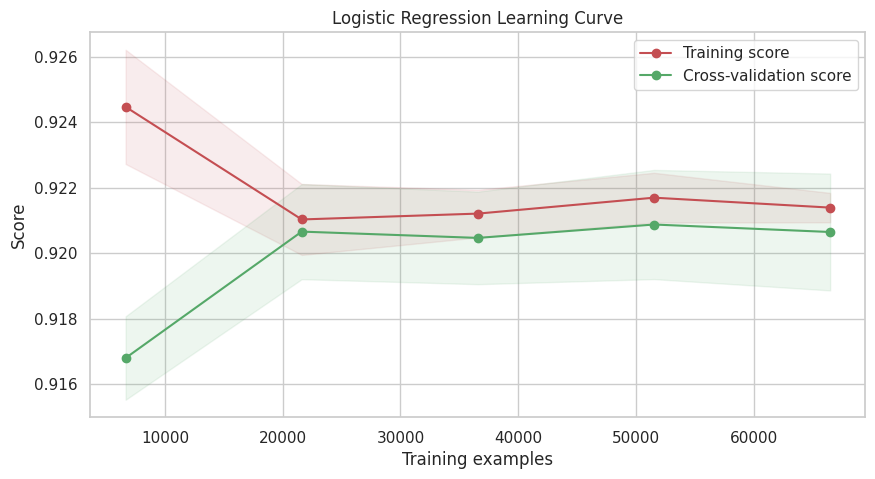

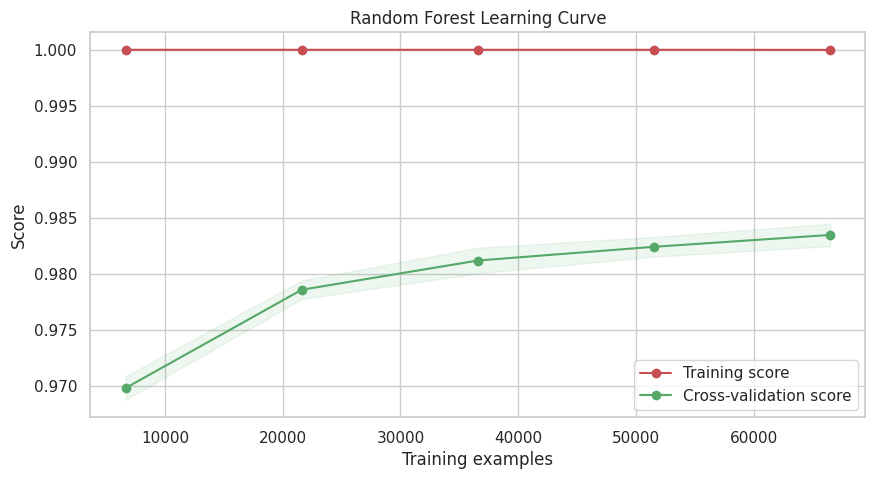

In [26]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(model, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    axes.plot(train_sizes, train_scores_mean, 'o-', label="Training score", color="r")
    axes.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score", color="g")
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="r", alpha=0.1)
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="g", alpha=0.1)

    axes.legend(loc="best")
    return plt

# Plot learning curve for Logistic Regression
plot_learning_curve(log_reg, "Logistic Regression Learning Curve", X_train_scaled, y_train, cv=5).show()

# Plot learning curve for Random Forest
plot_learning_curve(random_forest, "Random Forest Learning Curve", X_train, y_train, cv=5).show()


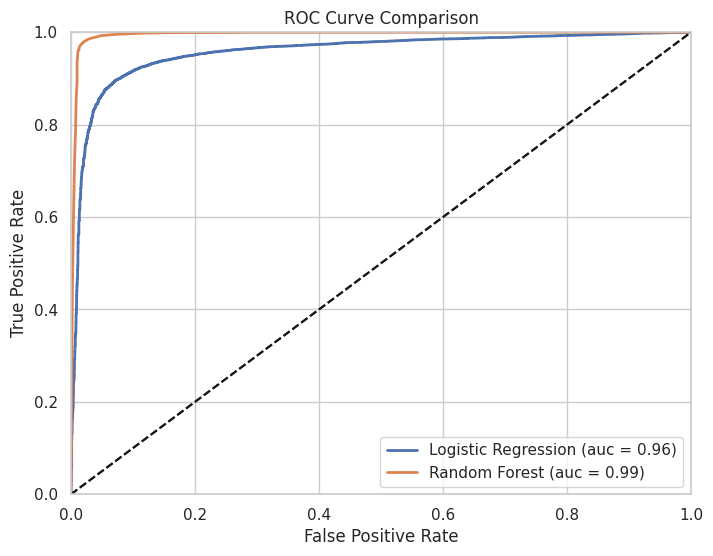

In [27]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X, y, label=None):
    y_scores = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, linewidth=2, label=f"{label} (auc = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plt.figure(figsize=(8, 6))
plot_roc_curve(log_reg, X_test_scaled, y_test, "Logistic Regression")
plot_roc_curve(random_forest, X_test, y_test, "Random Forest")
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()


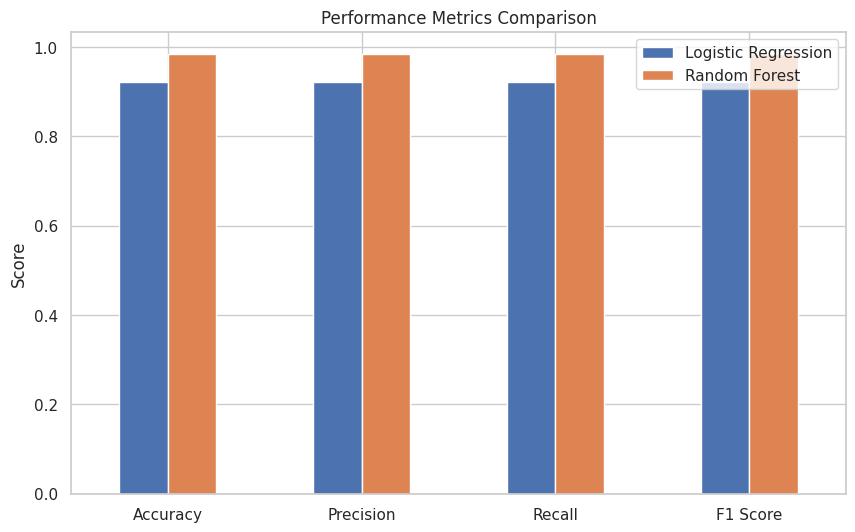

In [28]:
metrics_df = pd.DataFrame({
    "Logistic Regression": [accuracy_score(y_test, log_reg_preds), precision_score(y_test, log_reg_preds, average='weighted'),
                            recall_score(y_test, log_reg_preds, average='weighted'), f1_score(y_test, log_reg_preds, average='weighted')],
    "Random Forest": [accuracy_score(y_test, rf_preds), precision_score(y_test, rf_preds, average='weighted'),
                      recall_score(y_test, rf_preds, average='weighted'), f1_score(y_test, rf_preds, average='weighted')]
}, index=["Accuracy", "Precision", "Recall", "F1 Score"])

metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


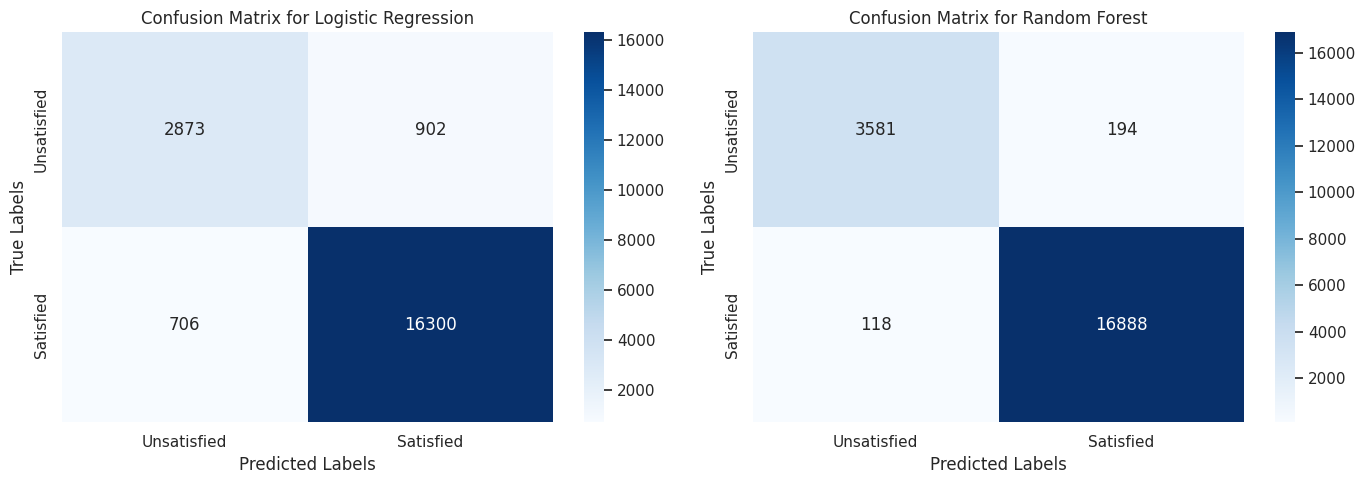

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrices
cm_lr = confusion_matrix(y_test, log_reg_preds)
cm_rf = confusion_matrix(y_test, rf_preds)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name, ax):
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.xaxis.set_ticklabels(['Unsatisfied', 'Satisfied'])
    ax.yaxis.set_ticklabels(['Unsatisfied', 'Satisfied'])

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
plot_confusion_matrix(cm_lr, "Logistic Regression", axes[0])
plot_confusion_matrix(cm_rf, "Random Forest", axes[1])
plt.tight_layout()
plt.show()
